##Importing the required libraries

In [1]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

##Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##Data Analysis

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

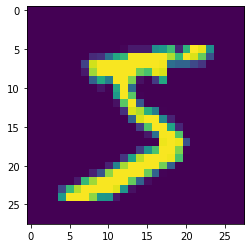

In [7]:
plt.imshow(x_train[0])

##Data Pre-processing

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Creating the model

In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation = "softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

##Training the Model

In [16]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 206s 109ms/step - loss: 0.2102 - accuracy: 0.9489 - val_loss: 0.0863 - val_accuracy: 0.9739
Epoch 2/5
1875/1875 [==============================] - 218s 116ms/step - loss: 0.0671 - accuracy: 0.9793 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 232s 124ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.1003 - val_accuracy: 0.9716
Epoch 4/5
1875/1875 [==============================] - 211s 112ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.1057 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.1216 - val_accuracy: 0.9711


##Testing the Model

In [17]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.12161203473806381, 0.9710999727249146]


In [18]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 97ms/step
[[2.4263060e-11 3.7708022e-15 2.1805531e-09 1.7330168e-06 1.9409010e-16
  2.5027820e-14 3.7569286e-17 9.9999821e-01 8.1870777e-10 1.8176243e-08]
 [3.5553769e-09 3.3897372e-13 9.9999869e-01 7.9651894e-09 1.6632579e-11
  2.1115373e-11 1.3499343e-06 2.0087952e-15 1.4527486e-08 5.5546737e-16]
 [4.9821124e-06 9.7115135e-01 8.2059878e-06 1.1111596e-09 2.8789235e-02
  1.3368455e-06 6.7182617e-07 1.5170215e-08 4.4259181e-05 1.2837859e-09]
 [1.0000000e+00 9.9256994e-16 9.9473740e-10 2.8711026e-13 3.0129069e-11
  9.5899309e-11 1.7062811e-09 3.1928866e-14 8.2825677e-11 7.2499728e-10]]


In [19]:
print(np.argmax(prediction, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


##Saving the Model

In [23]:
model.save("model.h5")